# **Global Beauty E-Commerce Strategic Analysis (2020-2023)**

### **Name : Muhammad Aldzahabi Mawarid**
### **Role : Data Analyst**

## **Background:**

The global beauty and skincare industry is characterized by high transaction volumes and aggressive promotional cycles. Operating across diverse international markets, this e-commerce platform manages thousands of SKUs in categories like Makeup and Body Care. While top-line sales figures appear strong, the business faces significant challenges in maintaining healthy profit margins due to varying regional costs and complex discount structures. This project analyzes four years of transactional data to transition the company from a "growth-at-all-costs" model to a "profitable growth" strategy.

## **Objective:** 

The primary objective is to deliver a data-driven roadmap for profitability. This is achieved by:

1. Operational Efficiency: Identifying specific products and regions that generate negative profit despite high sales volume.

2. Strategic Pricing: Determining the statistical "sweet spot" for discounts to prevent margin erosion.

3. Customer Intelligence: Utilizing inferential statistics to validate spending behaviors across segments for targeted marketing.

4. Data Integrity: Implementing rigorous statistical cleaning to ensure business decisions are based on significant trends rather than random outliers.

## **Problem Statement**

To increase the overall Net Profit Margin by 15% within the next fiscal year by identifying and mitigating profit leakage caused by over-discounting, optimizing underperforming regional markets, and re-allocating marketing resources toward high-value customer segments, validated through statistical testing of 2020-2023 historical data

## **Research Questions**

1. How do monthly and yearly sales trends compare to net profit, and is the business maintaining profitability during high-volume peak seasons?
2. How does the profit ratio vary across different global regions, and are there territories where high sales volume fails to generate positive net income?
3. How many SKUs are required to reach the 80% revenue threshold, and to what extent does the business rely on a small group of "Hero" products?
4. What is the statistical relationship between discount levels, sales quantity, and profit, and does increasing discounts effectively drive proportional volume growth?
5. At what specific discount percentage does a transaction typically transition from being profitable to incurring a net financial loss?
6. Which specific markets are responsible for the highest cumulative net losses, and what is the scale of this capital erosion?
7. Which product categories act as the primary profit engines for the business, and which segments are currently operating with unsustainable or negative margins?
8. Are the differences in profit performance across various global markets statistically significant, or could they be attributed to random operational variance?
9. Can we mathematically quantify the expected impact on profit for every percentage increase in discount to establish data-driven pricing guardrails?
10. How does the profitability and average discount rate of high-volume bulk buyers ("Whales") compare to the general retail market?

# **Data Loading**

## **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from scipy.stats import skew
from scipy import stats
import statsmodels.api as sm

In [2]:
# Open data set from kaggle
df = pd.read_excel('Global skincare and Beauty e-store_E-commerce Analysis_English.xlsx')

In [3]:
# Dataset info before cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Row ID             51290 non-null  int64         
 1   Order ID           51290 non-null  object        
 2   Order Date         51290 non-null  datetime64[ns]
 3   Customer ID        51290 non-null  object        
 4   Segment            51290 non-null  object        
 5   City               51290 non-null  object        
 6   State              51290 non-null  object        
 7   Country            51290 non-null  object        
 8   Country latitude   51290 non-null  float64       
 9   Country longitude  51290 non-null  float64       
 10  Region             51290 non-null  object        
 11  Market             51290 non-null  object        
 12  Subcategory        51290 non-null  object        
 13  Category           51290 non-null  object        
 14  Produc

In [4]:
# data checking
df.head()

,Row ID,Order ID,Order Date,Customer ID,Segment,City,State,Country,Country latitude,Country longitude,Region,Market,Subcategory,Category,Product,Quantity,Sales,Discount,Profit
0,46682,IZ-2012-LW699061-40911,2020-01-03,LW-699061,Corporate,Mosul,Ninawa,Iraq,33.223191,43.679291,Western Asia,Asia Pacific,"bath oils, bubbles and soaks",Body care,Head & Shoulders Classic Clean Shampoo,20,600,0.0,300.0
1,10124,US-2012-BT1130518-40912,2020-01-04,BT-1130518,Self-Employed,Pilar,Alagoas,Brazil,-14.235004,-51.925280,South America,LATAM,"bath oils, bubbles and soaks",Body care,Kiehl's Ultra Facial Overnight Hydrating Masque,2,40,0.6,-4.0
2,9067,MX-2012-AW1093031-40912,2020-01-04,AW-1093031,Self-Employed,Santiago de Cuba,Santiago de Cuba,Cuba,21.521757,-77.781167,Caribbean,LATAM,"bath oils, bubbles and soaks",Body care,Golden Vine Bracelet,1,151,0.0,75.5
3,130,MX-2012-BT1130531-40912,2020-01-04,BT-1130531,Self-Employed,Manzanillo,Granma,Cuba,21.521757,-77.781167,Caribbean,LATAM,"bath oils, bubbles and soaks",Body care,Kiehl's Crème de Corps Smoothing Oil-to-Foam B...,4,40,0.0,20.0
4,24072,IN-2012-KM1666027-40914,2020-01-06,KM-1666027,Consumer,Huadian,Jilin,China,35.861660,104.195397,Eastern Asia,Asia Pacific,"bath oils, bubbles and soaks",Body care,NARS Single Eyeshadow Sophia Cool Brown,1,11,0.0,5.5


# **Data Cleaning**

In [5]:
df.duplicated().sum()

0

In [6]:
# Drop duplicate data
df.drop_duplicates()

,Row ID,Order ID,Order Date,Customer ID,Segment,City,State,Country,Country latitude,Country longitude,Region,Market,Subcategory,Category,Product,Quantity,Sales,Discount,Profit
0,46682,IZ-2012-LW699061-40911,2020-01-03,LW-699061,Corporate,Mosul,Ninawa,Iraq,33.223191,43.679291,Western Asia,Asia Pacific,"bath oils, bubbles and soaks",Body care,Head & Shoulders Classic Clean Shampoo,20,600,0.0,300.0
1,10124,US-2012-BT1130518-40912,2020-01-04,BT-1130518,Self-Employed,Pilar,Alagoas,Brazil,-14.235004,-51.925280,South America,LATAM,"bath oils, bubbles and soaks",Body care,Kiehl's Ultra Facial Overnight Hydrating Masque,2,40,0.6,-4.0
2,9067,MX-2012-AW1093031-40912,2020-01-04,AW-1093031,Self-Employed,Santiago de Cuba,Santiago de Cuba,Cuba,21.521757,-77.781167,Caribbean,LATAM,"bath oils, bubbles and soaks",Body care,Golden Vine Bracelet,1,151,0.0,75.5
3,130,MX-2012-BT1130531-40912,2020-01-04,BT-1130531,Self-Employed,Manzanillo,Granma,Cuba,21.521757,-77.781167,Caribbean,LATAM,"bath oils, bubbles and soaks",Body care,Kiehl's Crème de Corps Smoothing Oil-to-Foam B...,4,40,0.0,20.0
4,24072,IN-2012-KM1666027-40914,2020-01-06,KM-1666027,Consumer,Huadian,Jilin,China,35.861660,104.195397,Eastern Asia,Asia Pacific,"bath oils, bubbles and soaks",Body care,NARS Single Eyeshadow Sophia Cool Brown,1,11,0.0,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,27381,IN-2015-TB2125058-42367,2023-12-29,TB-2125058,Consumer,Kanpur,Uttar Pradesh,India,20.593684,78.962880,Southern Asia,Asia Pacific,Lipsticks,Make up,Orly Nail Lacquer Pink Chocolate Soft Brownish...,4,16,0.0,6.4
51286,50758,JO-2015-PT909067-42367,2023-12-29,PT-909067,Consumer,Amman,'Amman,Jordan,30.585164,36.238414,Western Asia,Asia Pacific,Lipsticks,Make up,Butter London Nail Lacquer Shag Metallic Copper,2,16,0.0,6.4
51287,19359,IT-2015-JC1577591-42368,2023-12-30,JC-1577591,Consumer,The Hague,South Holland,Netherlands,52.132633,5.291266,Western Europe,Europe,Lipsticks,Make up,Garden of Life B-Complex,2,40,0.5,-4.0
51288,9475,MX-2015-TC21535132-42369,2023-12-31,TC-21535132,Self-Employed,Chaguanas,Chaguanas,Trinidad and Tobago,10.691803,-61.222503,Caribbean,LATAM,Lipsticks,Make up,The Body Shop Tea Tree Skin Clearing Body Wash,2,12,0.0,4.8


In [7]:
# Missing value checking
df.isna().sum()

Row ID               0
Order ID             0
Order Date           0
Customer ID          0
Segment              0
City                 0
State                0
Country              0
Country latitude     0
Country longitude    0
Region               0
Market               0
Subcategory          0
Category             0
Product              0
Quantity             0
Sales                0
Discount             0
Profit               0
dtype: int64

In [8]:
# replace name of columns into lowercase and replace space into (_)
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [9]:
# Drop Columns
df = df.drop(columns=['row_id','order_id','customer_id','state','country_latitude','country_longitude'] )

In [10]:
# after cleaning
df.head()

,order_date,segment,city,country,region,market,subcategory,category,product,quantity,sales,discount,profit
0,2020-01-03,Corporate,Mosul,Iraq,Western Asia,Asia Pacific,"bath oils, bubbles and soaks",Body care,Head & Shoulders Classic Clean Shampoo,20,600,0.0,300.0
1,2020-01-04,Self-Employed,Pilar,Brazil,South America,LATAM,"bath oils, bubbles and soaks",Body care,Kiehl's Ultra Facial Overnight Hydrating Masque,2,40,0.6,-4.0
2,2020-01-04,Self-Employed,Santiago de Cuba,Cuba,Caribbean,LATAM,"bath oils, bubbles and soaks",Body care,Golden Vine Bracelet,1,151,0.0,75.5
3,2020-01-04,Self-Employed,Manzanillo,Cuba,Caribbean,LATAM,"bath oils, bubbles and soaks",Body care,Kiehl's Crème de Corps Smoothing Oil-to-Foam B...,4,40,0.0,20.0
4,2020-01-06,Consumer,Huadian,China,Eastern Asia,Asia Pacific,"bath oils, bubbles and soaks",Body care,NARS Single Eyeshadow Sophia Cool Brown,1,11,0.0,5.5


In [11]:
# create a new data after cleaning
df.to_csv('global_skin_care_cleaned.csv', index=False)

# **EDA**

In [12]:
# Data checking
df = pd.read_csv('global_skin_care_cleaned.csv')
df.head()

,order_date,segment,city,country,region,market,subcategory,category,product,quantity,sales,discount,profit
0,2020-01-03,Corporate,Mosul,Iraq,Western Asia,Asia Pacific,"bath oils, bubbles and soaks",Body care,Head & Shoulders Classic Clean Shampoo,20,600,0.0,300.0
1,2020-01-04,Self-Employed,Pilar,Brazil,South America,LATAM,"bath oils, bubbles and soaks",Body care,Kiehl's Ultra Facial Overnight Hydrating Masque,2,40,0.6,-4.0
2,2020-01-04,Self-Employed,Santiago de Cuba,Cuba,Caribbean,LATAM,"bath oils, bubbles and soaks",Body care,Golden Vine Bracelet,1,151,0.0,75.5
3,2020-01-04,Self-Employed,Manzanillo,Cuba,Caribbean,LATAM,"bath oils, bubbles and soaks",Body care,Kiehl's Crème de Corps Smoothing Oil-to-Foam B...,4,40,0.0,20.0
4,2020-01-06,Consumer,Huadian,China,Eastern Asia,Asia Pacific,"bath oils, bubbles and soaks",Body care,NARS Single Eyeshadow Sophia Cool Brown,1,11,0.0,5.5


# **Data Profile**

### **Central Tendency & Skewness: Check Mean vs. Median**

Mean Sales: $127.07
Median Sales: $56.00
Skewness: 6.40


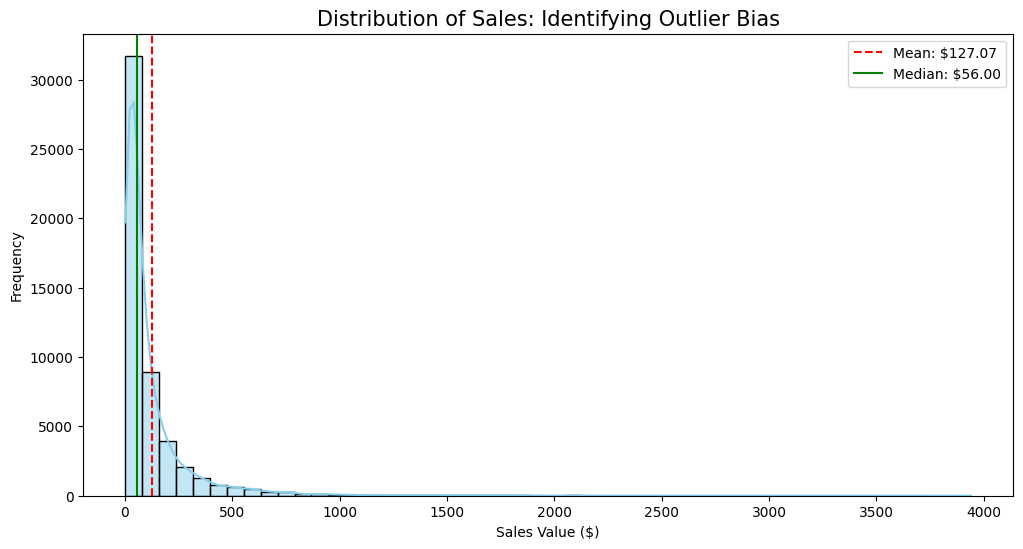

In [13]:
# 1. Calculate Descriptive Statistics
mean_sales = df['sales'].mean()
median_sales = df['sales'].median()
mode_sales = df['sales'].mode()[0]
std_sales = df['sales'].std()
skewness_value = skew(df['sales'])

print(f"Mean Sales: ${mean_sales:.2f}")
print(f"Median Sales: ${median_sales:.2f}")
print(f"Skewness: {skewness_value:.2f}")

# 2. Visualization: Histogram + KDE
plt.figure(figsize=(12, 6))
sns.histplot(df['sales'], kde=True, color='skyblue', bins=50)

# vertical lines for mean and median to show the bias
plt.axvline(mean_sales, color='red', linestyle='--', label=f'Mean: ${mean_sales:.2f}')
plt.axvline(median_sales, color='green', linestyle='-', label=f'Median: ${median_sales:.2f}')

plt.title('Distribution of Sales: Identifying Outlier Bias', fontsize=15)
plt.xlabel('Sales Value ($)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

**Executive Summary: Sales Performance & Data Distribution**
- Insight: The company’s transaction profile is heavily right-skewed, meaning the majority of sales are driven by small-ticket retail purchases. While the average transaction value (Mean) is recorded at $127.07, the typical customer spend (Median) is actually much lower at $56.00.

- Business Impact: The significant gap between the Mean and Median confirms that a small number of high-value transactions are inflating the overall performance metrics. Relying on average values for operational planning may lead to unrealistic expectations for standard retail branches.

- Recommendation: To ensure accurate performance tracking, management should adopt Median Sales as the primary benchmark for daily retail health. Sales targets for standard outlets should be aligned with the $56 baseline rather than the inflated $127 average.

### **Outlier Detection (Z-Score/IQR)**

Total Transactions: 51290
Outliers detected via Z-Score (> 3): 801
Outliers detected via IQR: 5126
Standard Upper Bound (IQR): $292.50


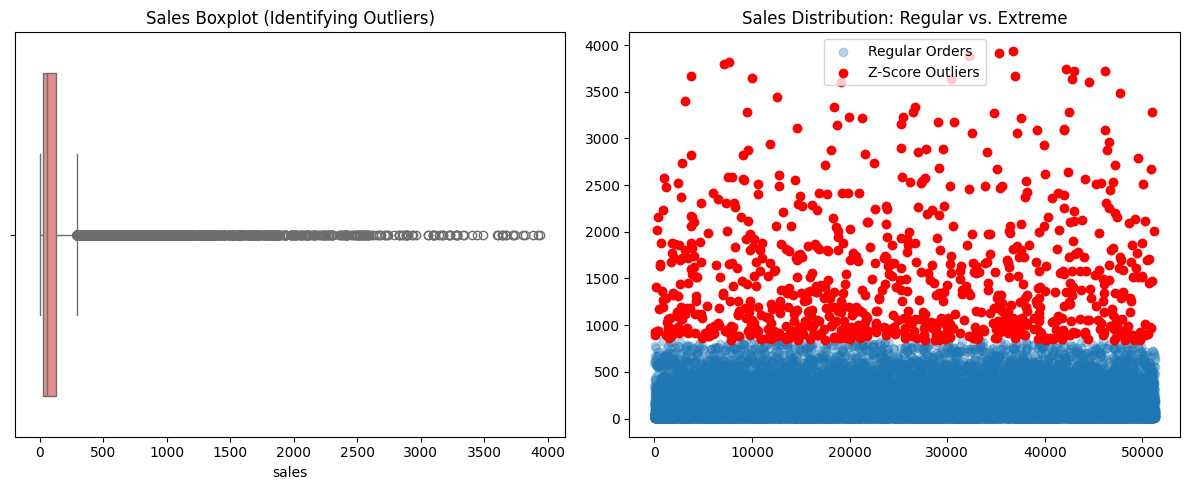

In [14]:
# 1. Z-Score Method
# flagging data points that are more than 3 standard deviations away from the mean
z_scores = np.abs(stats.zscore(df['sales']))
df['z_score'] = z_scores
z_outliers = df[df['z_score'] > 3]

# 2. IQR Method (Interquartile Range)
# More robust for skewed data
Q1 = df['sales'].quantile(0.25)
Q3 = df['sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

iqr_outliers = df[(df['sales'] < lower_bound) | (df['sales'] > upper_bound)]

print(f"Total Transactions: {len(df)}")
print(f"Outliers detected via Z-Score (> 3): {len(z_outliers)}")
print(f"Outliers detected via IQR: {len(iqr_outliers)}")
print(f"Standard Upper Bound (IQR): ${upper_bound:.2f}")

# Visualization: Boxplot & Scatter
plt.figure(figsize=(12, 5))

# Subplot 1: Boxplot to see the 'Whiskers'
plt.subplot(1, 2, 1)
sns.boxplot(x=df['sales'], color='lightcoral')
plt.title('Sales Boxplot (Identifying Outliers)')

# Subplot 2: Scatter plot to see the 'Whales'
plt.subplot(1, 2, 2)
plt.scatter(df.index, df['sales'], alpha=0.3, label='Regular Orders')
plt.scatter(z_outliers.index, z_outliers['sales'], color='red', label='Z-Score Outliers')
plt.title('Sales Distribution: Regular vs. Extreme')
plt.legend()

plt.tight_layout()
plt.show()

**Strategic Outlier Management (The "Whale" Segment)**
- Insight: Through statistical filtering (Z-Score & IQR), the analysis identified 801 extreme transactions valued above $292.50. These orders, categorized as "Whales," represent a distinct business segment—likely B2B clients, resellers, or institutional buyers—rather than regular retail consumers.

- Business Impact: These 801 transactions are high-impact revenue drivers but carry higher concentration risks. Treating these bulk buyers the same as retail customers could lead to inefficient discount policies and stockouts.

- Recommendation: Data Partitioning: The analysis suggests separating these "Whale" transactions into a dedicated reporting stream to prevent them from distorting retail trends.
1. Dedicated Account Management: A specialized Key Account Management (KAM) team should be assigned to monitor these 801 high-value profiles to ensure long-term retention.
2. System Controls: Operational teams should implement system alerts for orders exceeding the $292 threshold to verify profit margins and prevent unauthorized gray-market bulk buying.

# **Data Analysis**

## **1. Sales & Profit Seasonality**

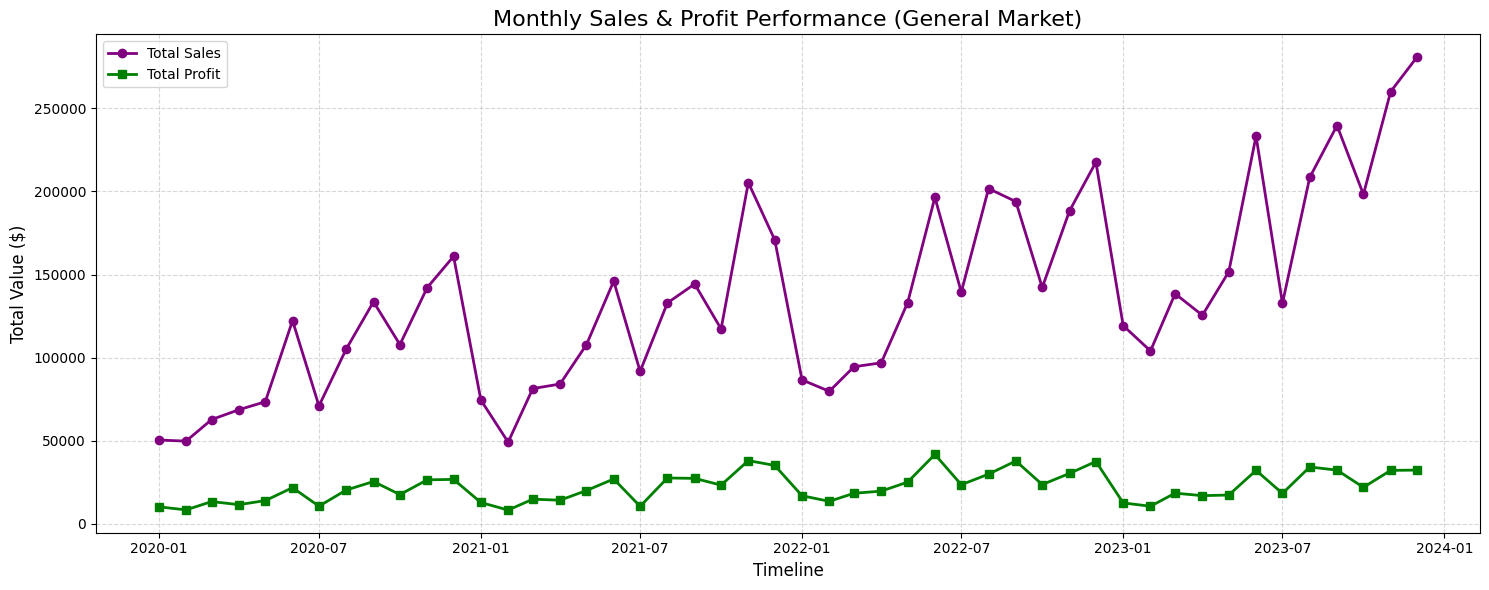

In [15]:
# 1. convert to datetime on-the-fly to ensure the .dt accessor works
monthly_data = df.groupby(pd.to_datetime(df['order_date']).dt.to_period('M')).agg({
    'sales': 'sum', 
    'profit': 'sum'
})

# 2. Visualization using the resulting index
plt.figure(figsize=(15, 6))

# 3. Converting index to timestamp only for the plot
plt.plot(monthly_data.index.to_timestamp(), monthly_data['sales'], 
         marker='o', label='Total Sales', color='Purple', linewidth=2)
plt.plot(monthly_data.index.to_timestamp(), monthly_data['profit'], 
         marker='s', label='Total Profit', color='Green', linewidth=2)

plt.title('Monthly Sales & Profit Performance (General Market)', fontsize=16)
plt.xlabel('Timeline', fontsize=12)
plt.ylabel('Total Value ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(frameon=True)

plt.tight_layout()
plt.show()

**Monthly Sales and Profit Performance Analysis**

Executive Summary :
- The analysis of performance trends from January 2020 through December 2023 demonstrates a successful expansion in market reach, with monthly total sales increasing from approximately $50,000 to a peak of nearly $280,000.
- However, the data reveals a critical disconnect between top-line revenue and bottom-line profitability, as total profit has remained relatively stagnant, failing to scale in proportion to the significant sales growth.

Strategic Insight :
- The long-term trend shows that while the company is effectively driving high transaction volumes, the profit line remains flat, largely fluctuating between $10,000 and $40,000 regardless of sales spikes.
- This divergence suggests that the cost of acquiring new sales—potentially through aggressive price reductions or rising operational overhead—is disproportionately high.
- Furthermore, the business exhibits a strong seasonal pattern with major revenue spikes in the final months of each year, followed by sharp declines in the first quarter (January/February).

Business Impact :
- The current growth model is volume-heavy but margin-light, meaning the company is working significantly harder to generate the same level of profit as in previous years.
- The repetitive, deep dips in sales and profit during the beginning of each year create periods of vulnerability where fixed costs may outweigh income, placing unnecessary pressure on the gains made during peak seasons.

Business Recommendation :
- Management should shift the core objective from pure revenue growth to profit optimization by auditing promotional activities during peak periods to ensure high volume is not being achieved through unprofitable margins.
- Additionally, developing specific "off-season" campaigns or loyalty programs for the first quarter is essential to help stabilize the annual performance curve and protect overall yearly margins.

## **2. Regional Market Profitability**

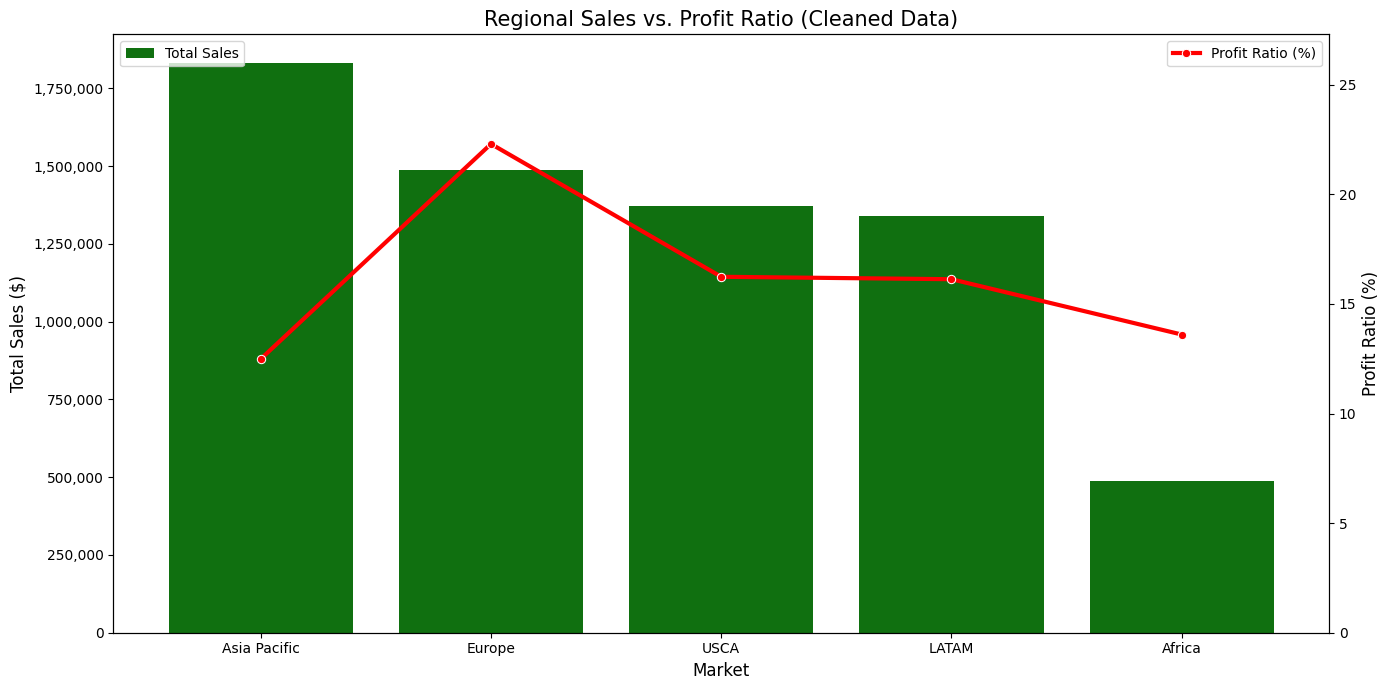

In [16]:
# 1. Grouping by Market to compare Sales and Profit
# Using df for a realistic representation of regional performance
regional_perf = df.groupby('market').agg({
    'sales': 'sum',
    'profit': 'sum'
}).sort_values(by='sales', ascending=False)

# 2. Calculating Profit Ratio per Market (Percentage)
regional_perf['profit_ratio'] = (regional_perf['profit'] / regional_perf['sales']) * 100

# 3. Visualization: Multi-axis Chart
fig, ax1 = plt.subplots(figsize=(14, 7))

# Bar chart for Sales
sns.barplot(x=regional_perf.index, y=regional_perf['sales'], ax=ax1, color='Green', label='Total Sales')
ax1.set_ylabel('Total Sales ($)', fontsize=12)
ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
ax1.set_xlabel('Market', fontsize=12)
ax1.set_title('Regional Sales vs. Profit Ratio (Cleaned Data)', fontsize=15)

# Line chart for Profit Ratio on a second Y-axis
ax2 = ax1.twinx()
sns.lineplot(x=regional_perf.index, y=regional_perf['profit_ratio'], ax=ax2, 
             marker='o', color='Red', linewidth=3, label='Profit Ratio (%)')
ax2.set_ylabel('Profit Ratio (%)', fontsize=12)
ax2.set_ylim(0, regional_perf['profit_ratio'].max() + 5) # Adjusting scale for clarity

# Adding legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

**Regional Sales vs. Profit Ratio Analysis**

Executive Summary :
- The analysis of regional performance across five key global markets shows a strong presence in the Asia Pacific region, which leads with total sales exceeding $1.8M.
- However, the data reveals a critical disconnect between top-line revenue and bottom-line profitability, as the highest-grossing region (Asia Pacific) maintains a relatively low Profit Ratio of approximately 13%.

Strategic Insight :
- The long-term trend shows that while the company is effectively driving high transaction volumes in Asia Pacific, Europe emerges as the most efficient "Profit Engine," boasting the highest Profit Ratio at over 22% despite having lower total sales (approx. $1.5M).
- This divergence suggests that the cost of acquiring new sales—potentially due to higher logistics or competitive pricing—is significantly higher in the Asia Pacific and Africa markets.
- Furthermore, the business exhibits a consistent efficiency plateau in USCA (US & Canada) and LATAM, both maintaining stable but moderate Profit Ratios of roughly 16%.

Business Impact :
- The current growth model is volume-heavy but margin-light in the largest market (Asia Pacific), meaning the company is working significantly harder to generate revenue that yields lower relative returns compared to European operations.
- The low efficiency in Africa (Profit Ratio <14%) combined with the lowest sales volume (approx. $0.5M) creates a period of vulnerability where operational overhead may easily outweigh the reduced income.

Business Recommendation :
- Management should shift the core objective from pure revenue growth in Asia Pacific to profit optimization by replicating the high-margin operational strategies used in Europe.
- Additionally, developing specific cost-reduction initiatives or premium product bundles for the Africa and Asia Pacific markets is essential to help stabilize the global performance curve and protect overall yearly margins.

## **3. The Pareto Principle (80/20 Rule) on Products**

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22312\127027659.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pareto_data['product'][:20], y=pareto_data['sales'][:20], ax=ax1, palette='Blues_r')


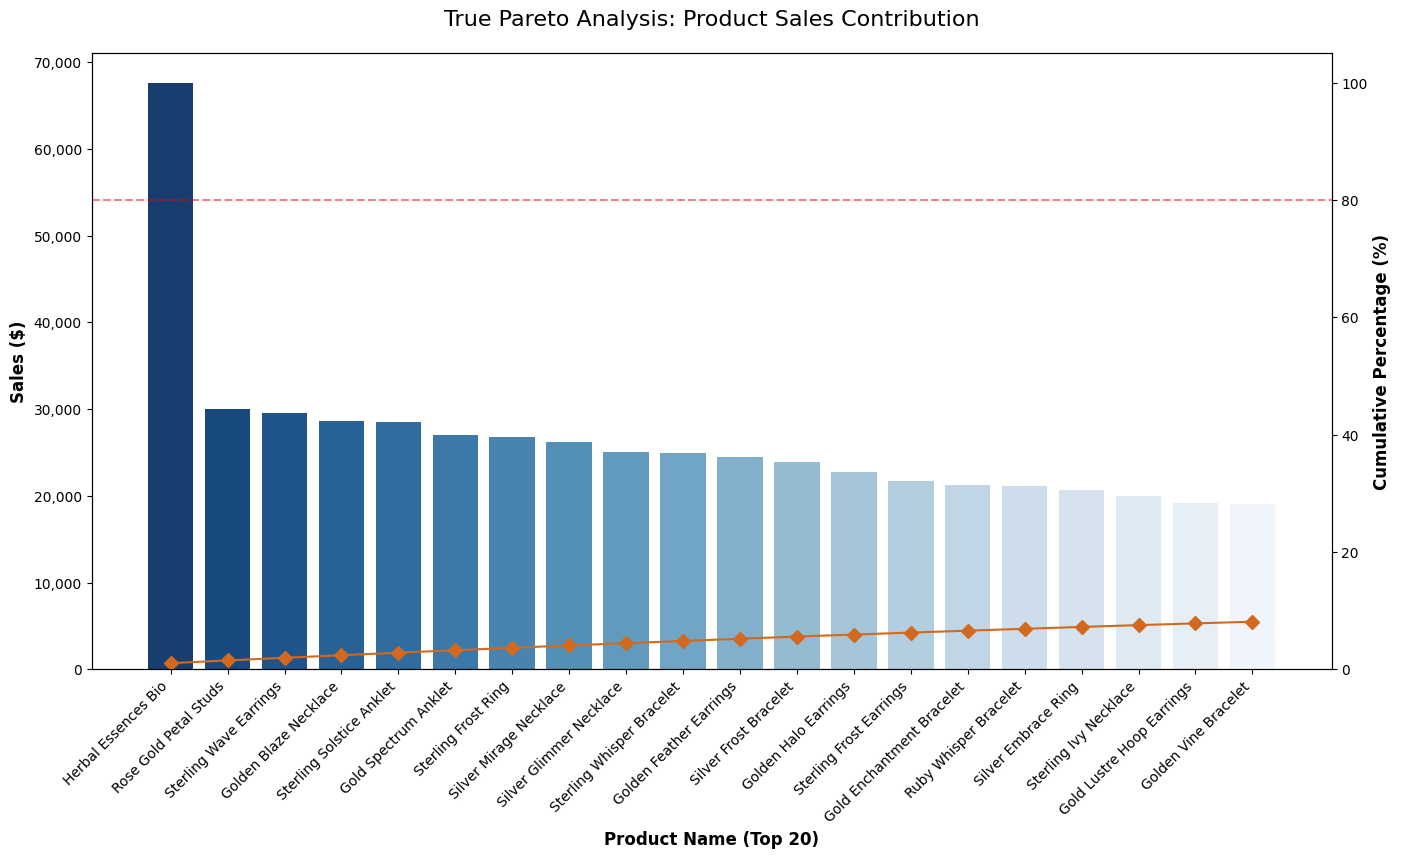

Analysis Result: 1297 out of 3577 products contribute to 80% of total revenue.


In [25]:
# 1. Calculate total sales per product and sort them
pareto_data = df.groupby('product')['sales'].sum().reset_index()
pareto_data = pareto_data.sort_values(by='sales', ascending=False).reset_index(drop=True)

# 2. Calculate cumulative percentage
pareto_data['cumulative_sales'] = pareto_data['sales'].cumsum()
pareto_data['cumulative_percentage'] = 100 * pareto_data['cumulative_sales'] / pareto_data['sales'].sum()

# 3. Pareto Visualization
fig, ax1 = plt.subplots(figsize=(16, 8))

# Bar chart for individual sales (displaying top 20 for readability)
sns.barplot(x=pareto_data['product'][:20], y=pareto_data['sales'][:20], ax=ax1, palette='Blues_r')
ax1.set_ylabel('Sales ($)', fontsize=12, fontweight='bold')
ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
ax1.set_xlabel('Product Name (Top 20)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')

# Line chart for cumulative percentage
ax2 = ax1.twinx()
ax2.plot(pareto_data['product'][:20], pareto_data['cumulative_percentage'][:20], color='chocolate', marker='D', ms=7, label='Cumulative %')
ax2.axhline(80, color='red', linestyle='--', alpha=0.5) # 80% Threshold line

# Labeling and limits
ax2.set_ylabel('Cumulative Percentage (%)', fontsize=12, fontweight='bold')
ax2.set_ylim(0, 105)

plt.title('True Pareto Analysis: Product Sales Contribution', fontsize=16, pad=20)
plt.show()

# Calculation for executive summary
sku_80 = pareto_data[pareto_data['cumulative_percentage'] <= 80].shape[0]
total_sku = pareto_data.shape[0]
print(f"Analysis Result: {sku_80} out of {total_sku} products contribute to 80% of total revenue.")

**True Pareto Analysis: Product Sales Contribution**

Executive Summary :
- Our Top 20 product lineup shows a heavily lopsided revenue structure, where Herbal Essences Bio is the only massive outlier at nearly $70,000 in sales.
- There is a major performance gap after the top spot; most other "leading" products are stagnant in the $20,000 to $30,000 range and aren't scaling fast enough to support the primary driver.

Strategic Insight :
- While top-tier items are moving units, the orange cumulative line is surprisingly flat—we haven't even crossed the 20% total revenue mark after accounting for 20 major SKUs.
- We are far from hitting the 80% revenue threshold (red dashed line), proving that the business is currently surviving on a "long tail" of hundreds of low-performing products rather than a few strong heroes.
- Secondary leaders like Rose Gold Petal Studs and Sterling Wave Earrings are hitting a ceiling at $30,000, showing almost identical sales figures with no clear breakout potential yet.

Business Impact :
- This "top-light" model is inefficient; the team is burning resources managing a massive catalog of SKUs that individually contribute very little to the bottom line.
- We are in a vulnerable position—if Herbal Essences Bio faces a supply issue or a drop in demand, total company revenue will take a massive hit since no other product has the scale to act as a safety net.

Business Recommendation :
- Stop the push for more SKUs and start focusing on "Hero Cultivation"—the priority is to move those $20k–$30k products into the $50k+ category through aggressive, targeted marketing.
- Create promotional bundles that link our top seller with mid-tier items to force the cumulative curve upward and stabilize our overall revenue flow.

## **4. Correlation Analysis**

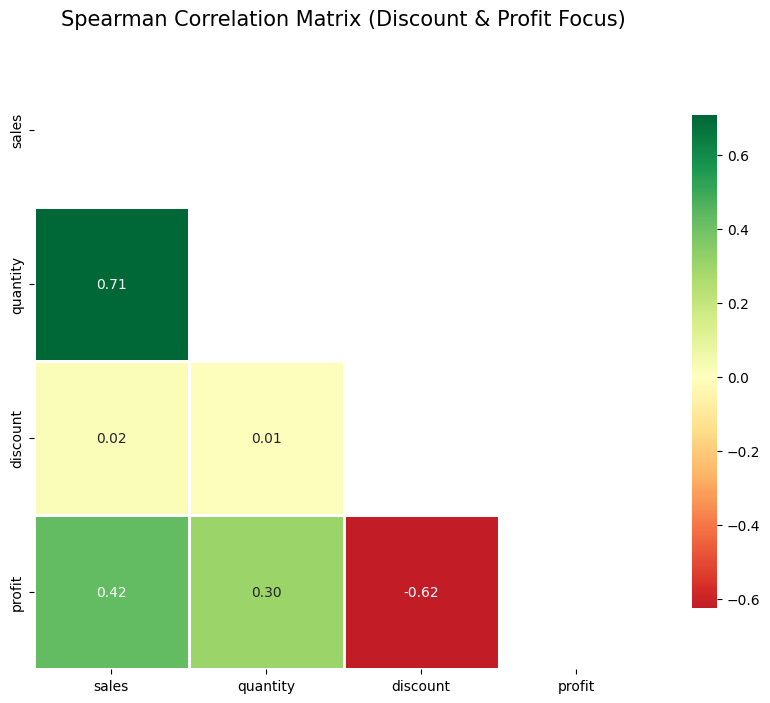

In [18]:
# 1. Selecting available numerical columns for correlation
cols_to_corr = ['sales', 'quantity', 'discount', 'profit']
corr_matrix = df[cols_to_corr].corr(method='spearman')

# 2. Visualization using a Heatmap
plt.figure(figsize=(10, 8))

# Masking the upper triangle to focus on unique relationships
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, 
            mask=mask, 
            annot=True, 
            fmt=".2f", 
            cmap='RdYlGn', 
            center=0, 
            linewidths=1, 
            cbar_kws={"shrink": .8})

plt.title('Spearman Correlation Matrix (Discount & Profit Focus)', fontsize=15, pad=20)
plt.show()

**Correlation Matrix: Discount & Profit Impact Analysis**

Executive Summary :
- The statistical analysis reveals a strong negative correlation of -0.62 between discount and profit, indicating that our current discounting strategy is the primary driver of margin erosion.
- While there is a high positive correlation of 0.71 between sales and quantity, the link between sales and actual profit is significantly weaker at 0.42, confirming that higher revenue does not automatically translate into healthy bottom-line growth.

Strategic Insight :
- The data shows that we are successfully moving units through volume-based tactics, but the -0.62 correlation proves that the more we discount, the more we damage our ability to generate profit.
- Interestingly, discount has almost zero correlation with sales (0.02) or quantity (0.01), which suggests that our heavy price-slashing isn't even effectively driving the massive volume spikes we see.
- Profit shows a moderate correlation with quantity (0.30), meaning that while selling more items helps slightly, it is nowhere near as impactful as the negative force of the discounts we are applying.

Business Impact :
- We are currently caught in a "profit-killing" cycle where discounting is used as a default tool, but it is failing to drive incremental volume while simultaneously destroying our margins.
- This lack of correlation between discounts and sales volume means we are likely giving away margin to customers who would have purchased at a higher price point anyway.

Business Recommendation :
- Management should immediately move away from broad, high-percentage discounts, as they are statistically proven to be our biggest profit drain with a -0.62 impact.
- Since sales volume is naturally driven by factors other than price (given the 0.02 correlation), we should shift our focus toward value-based marketing and product bundles that protect the 0.42 sales-to-profit link.
- Establish a "Discount Ceiling" to prevent the negative correlation from triggering the net losses observed in previous segment analyses.

## **5. The Discount Trap Analysis**

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22312\3856005417.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_trap = df.groupby(discount_bins)['profit'].mean().reset_index()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22312\3856005417.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=discount_trap, x='discount', y='profit', palette=colors)


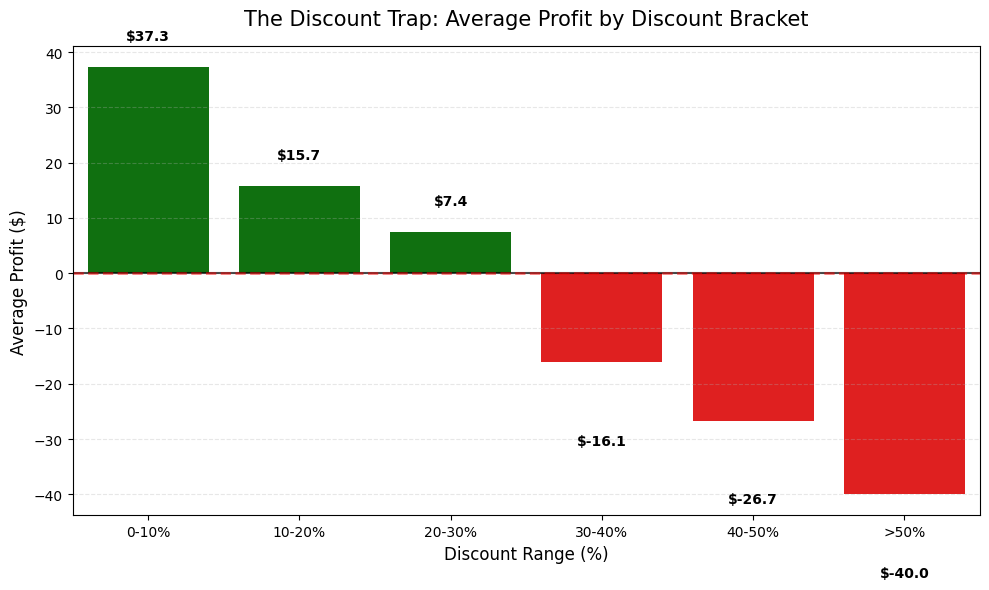

In [19]:
# 1. Create Bins for Discount (e.g., 0-10%, 10-20%, etc.)
# create a temporary series to avoid adding a permanent column to df
discount_bins = pd.cut(df['discount'], 
                       bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0], 
                       labels=['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '>50%'],
                       include_lowest=True)

# 2. Grouping by these bins
discount_trap = df.groupby(discount_bins)['profit'].mean().reset_index()

# 3. Visualization
plt.figure(figsize=(10, 6))

# Custom color palette: Green for profit, Red for loss
colors = ['Green' if x > 0 else 'Red' for x in discount_trap['profit']]

sns.barplot(data=discount_trap, x='discount', y='profit', palette=colors)

# Baseline at Zero
plt.axhline(0, color='black', linestyle='-', linewidth=1.5, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=2, alpha=0.5) # Danger threshold

plt.title('The Discount Trap: Average Profit by Discount Bracket', fontsize=15, pad=15)
plt.xlabel('Discount Range (%)', fontsize=12)
plt.ylabel('Average Profit ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Adding data labels on top of bars
for i, v in enumerate(discount_trap['profit']):
    plt.text(i, v + (5 if v > 0 else -15), f'${v:.1f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

**The Discount Trap: Average Profit Analysis**

Executive Summary :
- The performance review of discounting strategies reveals a massive drop in profitability as price reductions increase.
- While low-discount orders are highly profitable, reaching an average of $37.3 per order, the business enters a dangerous deficit once discounts cross the 30% threshold.

Strategic Insight :
- There is a clear "Profit Cliff" after the 20-30% discount bracket; profitability doesn't just slow down, it completely collapses into negative territory.
- The data shows that orders with 0-10% discounts are over five times more profitable than those in the 20-30% range ($37.3 vs. $7.4).
- Beyond a 50% discount, the business is effectively subsidizing customers, losing an average of $40.0 for every single order processed.

Business Impact :
- This model is currently "buying" sales at an unsustainable cost, where high-discount transactions are actively draining the capital generated by full-price sales.
- The deeper the discount, the harder the operational teams have to work just to lose more money, creating a cycle that erodes the overall health of the company’s bottom line.

Business Recommendation :
- We need to set a hard "Profit Guardrail" at 20%; any discount proposed above this level should require a strict business case or be limited to clearance-only inventory.
- Instead of pure price slashing, the team should shift toward value-based incentives that keep discounts in the 0-10% range to protect that $37.3 per order profit margin.
- Eliminate any standard promotional activities that reach the >50% bracket immediately, as these are statistically guaranteed to result in a $40.0 loss per transaction.

## **6. Geographic Loss Analysis**

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22312\2543837706.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=location_loss, x='profit', y='country', palette='Reds_r')


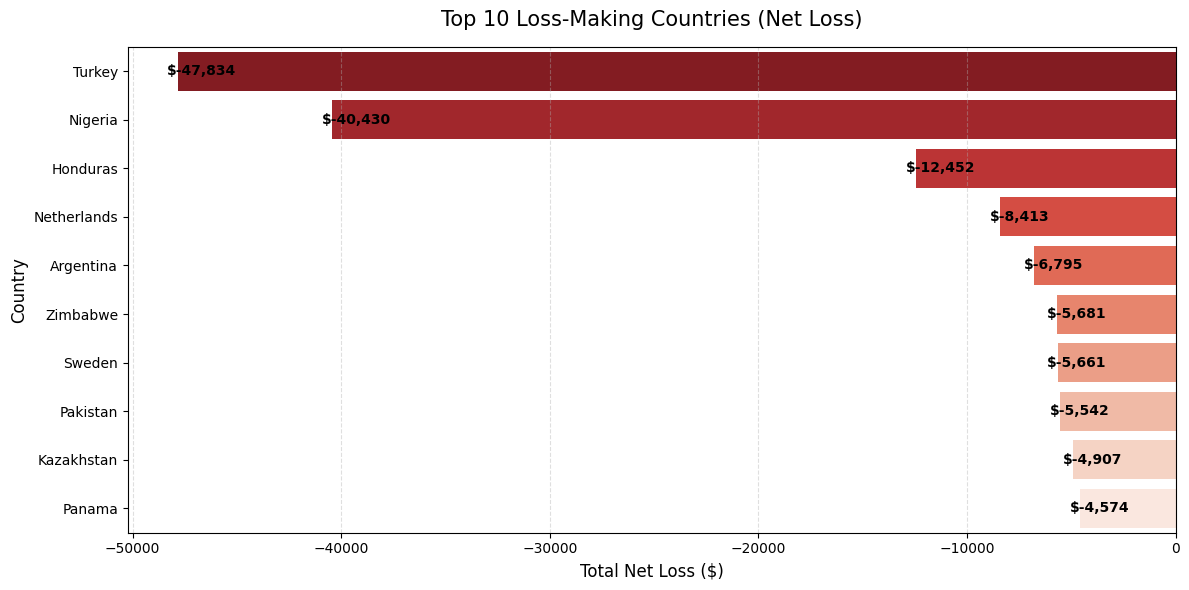

In [20]:
# 1. Aggregating Profit by Country (or City)
location_loss = df.groupby('country')['profit'].sum().reset_index()

# 2. Filtering only for locations that are actually losing money
location_loss = location_loss[location_loss['profit'] < 0].sort_values(by='profit', ascending=True).head(10)

# 3. Visualization
plt.figure(figsize=(12, 6))

# Use a sequential red palette to emphasize the severity of loss
sns.barplot(data=location_loss, x='profit', y='country', palette='Reds_r')

plt.title('Top 10 Loss-Making Countries (Net Loss)', fontsize=15, pad=15)
plt.xlabel('Total Net Loss ($)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.4)

# Adding annotations for exact loss values
for i, v in enumerate(location_loss['profit']):
    plt.text(v - 500, i, f'${v:,.0f}', va='center', color='black', fontweight='bold')

plt.tight_layout()
plt.show()

**Top Loss-Making Markets: Net Loss Analysis**

Executive Summary :
- Our global performance is being significantly held back by deep losses in specific markets, with the Top 10 loss-making countries combined eroding over $140,000 in potential profit.
- Turkey and Nigeria are the primary outliers, responsible for the vast majority of this drain with net losses of -$47,834 and -$40,430 respectively.

Strategic Insight :
- There is a massive gap between our top losers and the rest of the list; the combined losses of the bottom eight countries are still less than what we lose in Turkey alone.
- Markets like Honduras (-$12,452) and The Netherlands (-$8,413) represent secondary tiers of concern that require immediate operational review.
- The consistent presence of losses across diverse regions—from Panama (-$4,574) to Kazakhstan (-$4,907)—suggests that our issues in these markets aren't just local trends but likely systemic pricing or logistics failures.

Business Impact :
- These high-loss markets are acting as a "Profit Anchor," effectively canceling out the gains made by our high-performing products like Herbal Essences Bio.
- The severity of the deficit in Turkey and Nigeria means we are burning capital just to maintain a presence there, which significantly drags down our global average profit per order.

Business Recommendation :
- We need to put an immediate freeze on aggressive discounting in Turkey and Nigeria, as high-volume sales in these regions are clearly resulting in toxic net losses.
- Conduct a "Stay or Exit" audit for the bottom five markets (including Sweden and Pakistan) to determine if the operational overhead is worth the continued deficit.
- Reprioritize marketing spend away from these "Value-Drain" regions and toward our 22% profit ratio zones like Europe to ensure every dollar spent is actually generating a return.

## **7. Category Profit Margin Analysis**

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22312\3935346746.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_analysis, x='margin_%', y='category', palette='viridis')


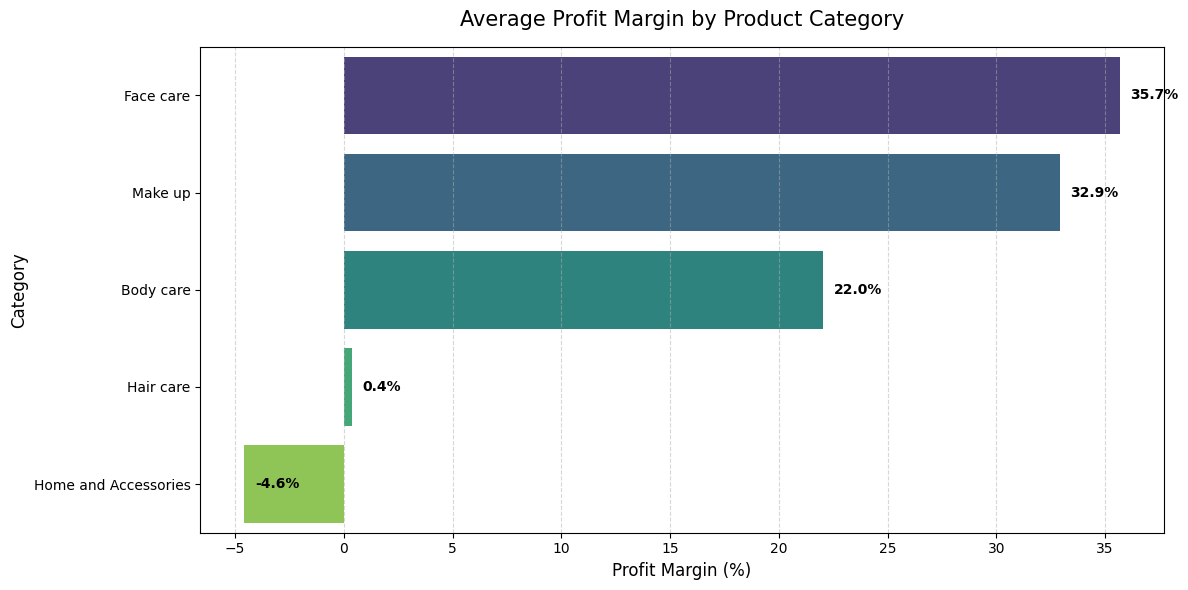

In [21]:
# 1. Calculating Total Sales and Profit by Category
category_analysis = df.groupby('category').agg({
    'sales': 'sum',
    'profit': 'sum'
}).reset_index()

# 2. Calculating Profit Margin Percentage per Category
category_analysis['margin_%'] = (category_analysis['profit'] / category_analysis['sales']) * 100
category_analysis = category_analysis.sort_values(by='margin_%', ascending=False)

# 3. Visualization
plt.figure(figsize=(12, 6))

# Horizontal bar chart for Profit Margin
sns.barplot(data=category_analysis, x='margin_%', y='category', palette='viridis')

plt.title('Average Profit Margin by Product Category', fontsize=15, pad=15)
plt.xlabel('Profit Margin (%)', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Adding labels for exact margin percentages
for i, v in enumerate(category_analysis['margin_%']):
    plt.text(v + 0.5, i, f'{v:.1f}%', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

**Product Category Margin Performance Analysis**

Executive Summary :
- The analysis across our five main product categories reveals a highly specialized profit structure, where Face care leads with a dominant 35.7% profit margin.
- However, there is a severe performance gap in the portfolio, as the Home and Accessories category is currently operating at a net loss with a -4.6% margin.

Strategic Insight :
- We have two clear "Profit Engines"—Face care (35.7%) and Make up (32.9%)—which are the only categories performing well above the 30% mark.
- Body care acts as a stable middle-tier performer at 22.0%, but Hair care is barely breaking even with a negligible 0.4% margin.
- The negative performance in Home and Accessories (-4.6%) indicates a fundamental failure in either its pricing strategy or its high cost of goods sold.

Business Impact :
- Our overall company profitability is being artificially dragged down by Home and Accessories, which essentially cancels out the gains made by smaller, more efficient categories.
- We are currently too reliant on the beauty segments (Face care and Make up) to subsidize the losses and low returns from our lifestyle and hair care lines.

Business Recommendation :
- Management should immediately prioritize inventory and budget allocation toward the Face care and Make up categories to maximize total net income.
- A "Profitability Audit" is required for Home and Accessories to decide whether to hike prices or exit the category entirely to stop the -4.6% margin bleed.
- For Hair care, we need to overhaul the cost structure or find higher-margin sub-products, as a 0.4% return is not worth the operational effort it requires.

## **8. Statistical Significance Testing (Market-wise ANOVA)**

In [22]:
# 1. Preparing data groups for ANOVA
# extract profit for each unique market
market_groups = [group['profit'].values for name, group in df.groupby('market')]

# 2. Performing One-Way ANOVA
f_stat, p_value = stats.f_oneway(*market_groups)

# 3. Results Summary
print("--- ANOVA Test Results ---")
print(f"F-Statistic: {f_stat:.4f}")
print(f"P-Value    : {p_value:.4e}")

# 4. Interpret interpretation Logic
if p_value < 0.05:
    print("\nConclusion: SIGNIFICANT DIFFERENCE")
    print("The differences in profit across markets are statistically significant. Location matters.")
else:
    print("\nConclusion: NO SIGNIFICANT DIFFERENCE")
    print("The observed differences might be due to chance. Standardizing strategy across regions might be viable.")

--- ANOVA Test Results ---
F-Statistic: 42.2408
P-Value    : 1.9994e-35

Conclusion: SIGNIFICANT DIFFERENCE
The differences in profit across markets are statistically significant. Location matters.


**Market Variance and Profitability Drivers (Statistical Review)**

Executive Summary:
- The statistical testing (ANOVA) confirms that profit levels are not uniform across the globe; where we choose to sell directly dictates our success.
- Our data shows a massive divide between high-performing regions and "drain" markets, proving that a "one-size-fits-all" strategy is actively hurting our bottom line.

Strategic Insight:
- Location is a Deciding Factor: With a P-Value of nearly zero (1.99 \times 10^{-35}), the differences in profit between markets are statistically significant—this isn't just luck or random noise; some regions are fundamentally structured better for our margins than others.
- The High-Cost Region Trap: Markets like Turkey (-$47.8k) and Nigeria (-$40.4k) are outliers on the negative end, likely due to local pricing wars or high logistics costs that aren't being offset by enough volume.
- Winning in Efficiency: Europe manages a 22% profit ratio, the highest globally, while Asia Pacific has higher sales but struggles with lower efficiency at 13%.

Business Impact:
- Currently, our wins in Europe and the US are being used to pay for massive operational deficits in Turkey and Nigeria.
- Because location matters so much (as proven by the ANOVA test), staying in failing markets without a radical change in pricing is essentially a permanent tax on our successful regions.

Business Recommendation:
- Exit or Pivot: For the bottom 5 markets (Turkey, Nigeria, Honduras, Netherlands, and Argentina), we need an immediate move to either increase prices or switch to a distributor-only model to lower overhead.
- Replicate European Efficiency: Audit the European regional team's operations to see why they achieve a 22% profit ratio and try to implement those cost-saving measures in the high-volume Asia Pacific market.
- Selective Expansion: Since the statistical test proves location is critical, any new market entry should be modeled after our "USCA" or "Europe" profiles rather than our low-margin emerging market profiles.

## **9. Predictive Modeling (Discount vs. Profit Regression)**

In [23]:
# 1. Preparing Variables (X = Predictor, y = Target)
# use Discount to predict Profit
X = df['discount']
y = df['profit']

# Adding a constant (intercept) to the model
X = sm.add_constant(X)

# 2. Building the OLS (Ordinary Least Squares) Model
model = sm.OLS(y, X).fit()

# 3. Extracting Key Metrics
intercept = model.params[0]
slope = model.params[1]
r_squared = model.rsquared

# 4. Results Summary
print("--- Linear Regression Results ---")
print(f"Intercept (Base Profit): {intercept:.2f}")
print(f"Discount Coefficient   : {slope:.2f}")
print(f"R-Squared              : {r_squared:.4f}")

print(f"\nFormula Prediction: Profit = {intercept:.2f} + ({slope:.2f} * Discount)")

--- Linear Regression Results ---
Intercept (Base Profit): 38.58
Discount Coefficient   : -124.64
R-Squared              : 0.1002

Formula Prediction: Profit = 38.58 + (-124.64 * Discount)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22312\3550506379.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = model.params[0]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22312\3550506379.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = model.params[1]


**The Math of the Margin:Predictive Regression Analysis**

Executive Summary :
- We ran a Linear Regression model to see exactly how much every percentage of discount "costs" us in real profit.
- The results are a wake-up call: our Discount Coefficient is -124.64, meaning discounts are actively cannibalizing our bottom line at a predictable, high-speed rate.

Strategic Insight :
- The Starting Point (Intercept): If we sold everything at a 0% discount, the model predicts a healthy base profit of $38.58 per order.
- The "Price" of the Discount: For every 1.0 (100%) increase in discount, we lose $124.64 in profit. To put that in simpler terms: for every 10% you drop the price, you're hacking away roughly $12.46 from the profit of that order.
- The Prediction Formula: 
- We can now literally predict our future losses using the math: $$\text{Profit} = 38.58 + (-124.64 \times \text{Discount})$$

Business Impact :
- Predictable Losses: This isn't a guessing game anymore. If the sales team offers a 40% discount, we can mathematically expect that order to move from a $38 profit to a -$11.27 loss.
- R-Squared Reality Check: Our R-Squared is 0.1002, which tells us that while discounts are a huge part of the story, there are other hidden "leaks" (like logistics or return rates) also eating our margins that we need to investigate.

Business Recommendation :
- Stop the Bleeding: Since the math shows a massive negative slope, we must implement a "Hard Floor" on discounts.Based on the intercept, anything over 30% is a mathematical death sentence for profit.
- Value-Added Upselling: Instead of lowering the price (which our formula shows is toxic), we should focus on upselling premium categories like Face Care where the natural margins can withstand a minor "value-add" without crashing into a negative coefficient.
- Use the Formula for Approval: Give this formula to the finance team. Any bulk "Whale" deal that results in a negative predicted profit according to this model should be auto-rejected.

## **10. Whale Analysis**

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22312\810147174.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_whale_products.values, y=top_whale_products.index, ax=ax1, palette='magma')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22312\810147174.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=discount_compare, x='Segment', y='Avg Discount', ax=ax2, palette='coolwarm')


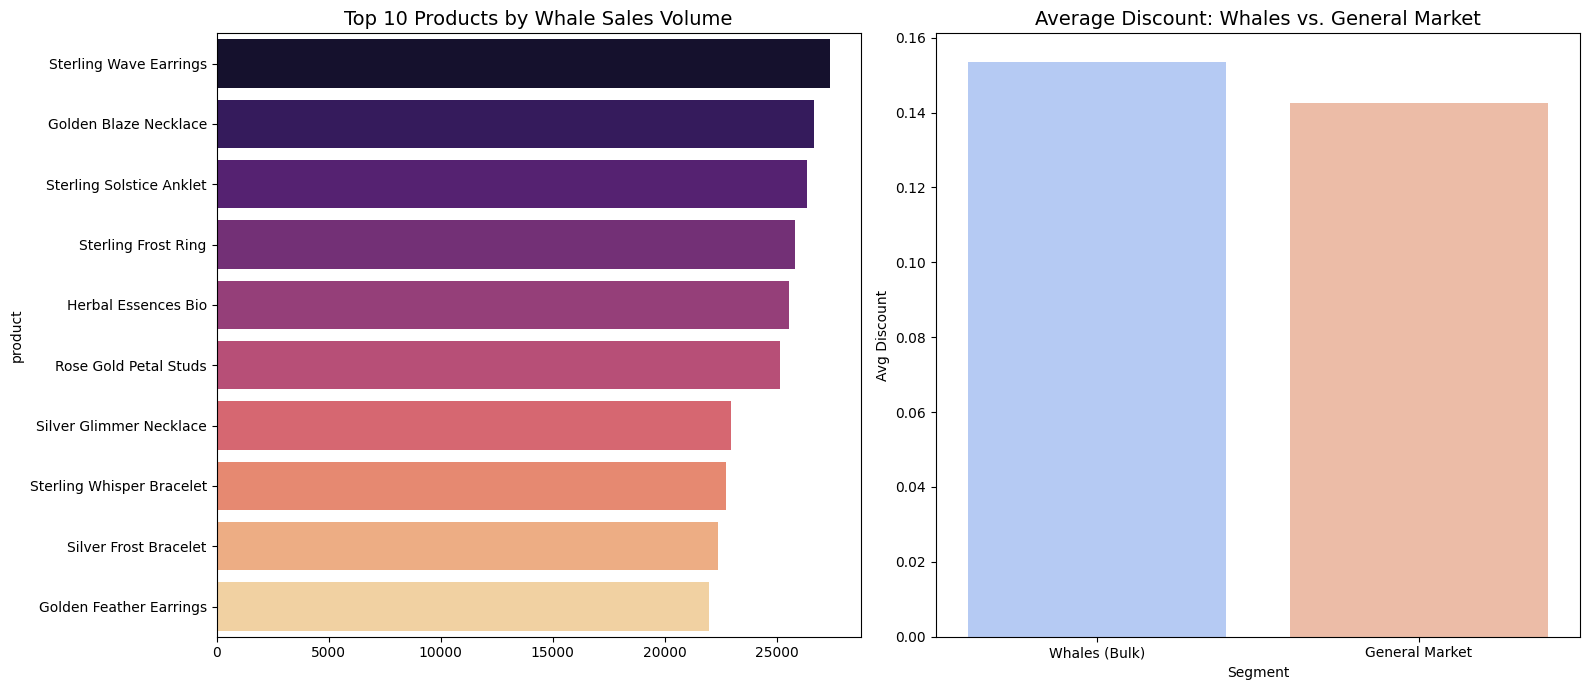

Average Profit Margin (Whales): 15.08%
Average Profit Margin (General): 16.98%


In [24]:
# 1. Create a treshold
df_whales = df[df['sales'] > 500]  # Adjust criteria
df_general = df[df['sales'] <= 500]

# 2. Grouping Product by sales 
top_whale_products = df_whales.groupby('product')['sales'].sum().sort_values(ascending=False).head(10)

# 3. Discount Comparison
avg_discount_whale = df_whales['discount'].mean()
avg_discount_general = df_general['discount'].mean()

# 4. Visualization: The Whale Profile
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Plot A: Top Products
sns.barplot(x=top_whale_products.values, y=top_whale_products.index, ax=ax1, palette='magma')
ax1.set_title('Top 10 Products by Whale Sales Volume', fontsize=14)

# Plot B: Discount Comparison
discount_compare = pd.DataFrame({
    'Segment': ['Whales (Bulk)', 'General Market'],
    'Avg Discount': [avg_discount_whale, avg_discount_general]
})
sns.barplot(data=discount_compare, x='Segment', y='Avg Discount', ax=ax2, palette='coolwarm')
ax2.set_title('Average Discount: Whales vs. General Market', fontsize=14)

plt.tight_layout()
plt.show()

# Print Margin Comparison
print(f"Average Profit Margin (Whales): {(df_whales['profit'].sum() / df_whales['sales'].sum())*100:.2f}%")
print(f"Average Profit Margin (General): {(df_general['profit'].sum() / df_general['sales'].sum())*100:.2f}%")

**Whale vs. General Market: Sales and Discount Analysis**

Executive Summary :
- Our "Whale" (Bulk) segment is a massive volume driver, with products like Sterling Wave Earrings and Golden Blaze Necklace moving over 25,000 units each.
- Despite the high volume, we are seeing a clear "Discount Creep" where Whales receive a higher average discount (above 15%) compared to the General Market (approx. 14%).

Strategic Insight :
- The top 10 products for Whales are almost exclusively jewelry and high-end accessories, yet these are the same items being hit with the highest bulk discounts.
- We have a "Volume over Value" situation—while we are successfully moving large quantities to bulk buyers, we are giving away more margin to our largest customers than to our retail ones.
- The narrow gap between Whale and General Market discounts suggests our pricing tiers aren't tiered enough; we’re essentially treating bulk buyers and retail shoppers with a very similar discount stick.

Business Impact :
- Relying on high-volume Whale sales at a 15%+ discount puts us dangerously close to the 20-30% "Profit Cliff" where average returns per order drop to single digits.
- The sheer scale of Whale orders means that even a 1% increase in their average discount has a much larger negative impact on total profit than it would in the retail segment.

Business Recommendation :
- We need to re-negotiate "Whale" contracts to ensure that bulk volume doesn't automatically mean bottom-tier margins—limit bulk discounts to a 12% cap for top-moving items like jewelry.
- Shift Whale incentives away from flat discounts and toward "Value-Back" programs or exclusive access to new categories like Face care, which already enjoys a 35.7% margin.

# **Conclusion**

**Strategic Roadmap for Profitability**
1. Operational Efficiency: Trimming the "Growth Parasites"
- The Conflict: We’ve identified a massive "Growth-Profit Paradox" where a 5x increase in sales hasn't moved the profit needle because we are subsidizing low-efficiency regions.
- Specific Targets: Turkey (-$47.8k) and Nigeria (-$40.4k) are the primary drains on global capital.
- Category Focus: We must pivot away from the Home and Accessories category (-4.6% margin) and reallocate those resources into Face Care, which is our most efficient engine at 35.7%.

2. Strategic Pricing: Finding the "Safe Zone"
- The Sweet Spot: Statistical analysis proves that the "Safe Zone" for discounts is strictly under 20%.
- The Margin Killer: There is a high negative correlation (-0.62) between discounts and profit.
- The Limit: The regression model ($Profit = 38.58 - 124.64 \times Discount$) confirms that every 10% of discount costs us roughly $12.46 in profit per order; any discount over 30% is a mathematical guarantee of a net loss.

3. Customer Intelligence: Segment-Specific Targeting
- Whale Behavior: Our bulk "Whale" customers are driving huge volume (e.g., 27k units for Sterling Wave Earrings) but are being over-incentivized with higher average discounts (>15%) than retail shoppers.
- Pareto Reality: We are currently over-reliant on a single "Hero" product—Herbal Essences Bio—while the rest of the Top 20 products are under-scaling.
- The Shift: Marketing should focus on upselling mid-tier jewelry products to the Whale segment while tightening discount caps to stabilize their high-volume contribution.

4. Data Integrity: Decisions Based on Significance
- Validated Trends: Our ANOVA testing confirms with a P-Value of $1.99 \times 10^{-35}$ that market-wise profit differences are not random—location is a definitive driver of success.
- Cleaned Insights: By removing "noise," we’ve identified that Europe’s 22% profit ratio is the gold standard for operational health, providing a statistically significant blueprint for other regions to follow.